In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

In [98]:
df = pd.read_csv('heart_attack_predictions.csv')

df.head(10)

,Country,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,...,LDL_Cholesterol,Triglycerides,Heart_Disease_Risk,Medication_Adherence,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level,Heart_Attack_Outcome
0,Germany,39,Male,210.091036,173.301650,Never,0.531933,Active,No,No,...,68.333573,165.060897,Medium,No,Urban,51.988416,Good,Tertiary,Low,Died
1,Egypt,88,Male,163.998730,137.381678,Former,5.626668,Sedentary,Yes,Yes,...,98.194015,452.124651,Medium,No,Suburban,97.739896,Good,NaN,Low,Died
2,Spain,60,Female,263.502590,139.737677,Former,0.928015,Active,No,Yes,...,118.767677,171.432620,Low,No,Urban,60.352793,Poor,Tertiary,Low,Survived
3,Canada,25,Female,292.003927,85.992807,Former,7.374519,Active,No,Yes,...,190.190597,329.553258,Medium,No,Urban,14.397347,Good,Secondary,High,Survived
4,France,54,Female,267.736563,119.882856,Former,4.317845,Sedentary,Yes,No,...,188.209372,449.953074,High,Yes,Rural,69.448684,Good,NaN,Low,Died
5,Pakistan,89,Male,192.824536,84.614988,Current,4.275495,Active,Yes,Yes,...,91.718371,476.605123,High,Yes,Suburban,23.806738,Good,Primary,Medium,Died
6,Germany,37,Female,248.192810,119.187008,Current,9.786531,Moderate,No,No,...,111.451727,471.972380,High,No,Urban,81.992726,Poor,Secondary,Medium,Died
7,Nigeria,67,Female,190.648952,88.151404,Current,0.282693,Active,Yes,Yes,...,134.535071,438.827926,Low,No,Urban,57.804529,Good,Primary,Medium,Died
8,Vietnam,36,Female,167.748324,174.399328,Never,3.382476,Active,Yes,No,...,136.219095,126.158745,Low,Yes,Suburban,20.029875,Poor,Secondary,Medium,Died
9,Canada,67,Female,170.507186,164.832277,Former,6.146588,Moderate,No,Yes,...,129.812473,376.639056,Low,Yes,Urban,95.596014,Poor,Tertiary,High,Survived


In [99]:
print("Amount of columns: ", df.shape[0])
print(df.isnull().sum())


Amount of columns:  623027
Country                         0
Age                             0
Gender                          0
Cholesterol_Level               0
Blood_Pressure                  0
Smoking_History                 0
Alcohol_Consumption             0
Physical_Activity               0
Obesity                         0
Diabetes                        0
Family_History                  0
Stress_Levels                   0
Dietary_Habits                  0
Heart_Attack_History            0
Chest_Pain                      0
Exercise_Induced_Angina         0
Resting_ECG                     0
Max_Heart_Rate_Achieved         0
Thalassemia                     0
HDL_Cholesterol                 0
LDL_Cholesterol                 0
Triglycerides                   0
Heart_Disease_Risk              0
Medication_Adherence            0
Urbanization_Level              0
Air_Pollution_Exposure          0
Access_To_Healthcare            0
Education_Level            155697
Income_Level         

In [100]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

df.head(10)

,Country,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,...,LDL_Cholesterol,Triglycerides,Heart_Disease_Risk,Medication_Adherence,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level,Heart_Attack_Outcome
0,7,39,1,210.091036,173.301650,2,0.531933,0,0,0,...,68.333573,165.060897,2,0,2,51.988416,1,2,1,0
1,5,88,1,163.998730,137.381678,1,5.626668,2,1,1,...,98.194015,452.124651,2,0,1,97.739896,1,3,1,0
2,20,60,0,263.502590,139.737677,1,0.928015,0,0,1,...,118.767677,171.432620,1,0,2,60.352793,2,2,1,1
3,3,25,0,292.003927,85.992807,1,7.374519,0,0,1,...,190.190597,329.553258,2,0,2,14.397347,1,1,0,1
4,6,54,0,267.736563,119.882856,1,4.317845,2,1,0,...,188.209372,449.953074,0,1,0,69.448684,1,3,1,0
5,14,89,1,192.824536,84.614988,0,4.275495,0,1,1,...,91.718371,476.605123,0,1,1,23.806738,1,0,2,0
6,7,37,0,248.192810,119.187008,0,9.786531,1,0,0,...,111.451727,471.972380,0,0,2,81.992726,2,1,2,0
7,13,67,0,190.648952,88.151404,0,0.282693,0,1,1,...,134.535071,438.827926,1,0,2,57.804529,1,0,2,0
8,24,36,0,167.748324,174.399328,2,3.382476,0,1,0,...,136.219095,126.158745,1,1,1,20.029875,2,1,2,0
9,3,67,0,170.507186,164.832277,1,6.146588,1,0,1,...,129.812473,376.639056,1,1,2,95.596014,2,2,0,1


In [181]:
# Define target variable
X = df.drop(columns=['Heart_Attack_Outcome'])
y = df['Heart_Attack_Outcome']

In [102]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
# Train k-NN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [104]:
# Predict
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


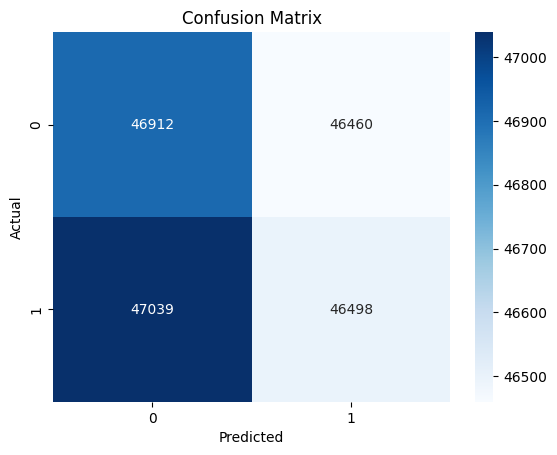

In [105]:

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [106]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4997619162266129
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     93372
           1       0.50      0.50      0.50     93537

    accuracy                           0.50    186909
   macro avg       0.50      0.50      0.50    186909
weighted avg       0.50      0.50      0.50    186909



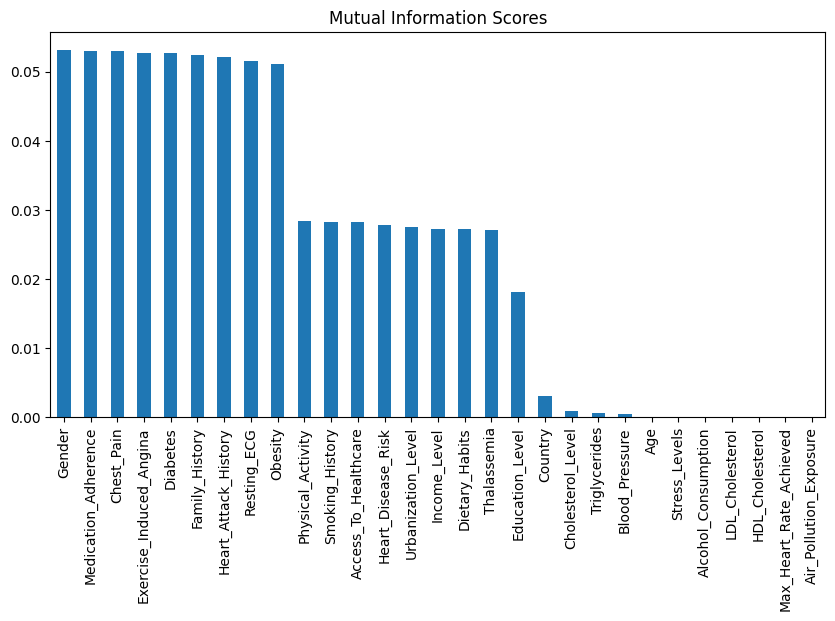

In [109]:
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information
mi_scores = mutual_info_classif(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
mi_series.plot(kind='bar')
plt.title("Mutual Information Scores")
plt.show()


In [111]:
# Grouping Columns
df['Age'] = pd.cut(df['Age'], bins=[0, 40, 60, 80, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
df['Cholesterol_Level'] = pd.cut(df['Cholesterol_Level'], bins=[0, 200, 240, 280, 320], labels=['Normal', 'Borderline High', 'High', 'Very High'])
df['Blood_Pressure'] = pd.cut(df['Blood_Pressure'], bins=[0, 120, 130, 140, 190], labels=['Normal', 'Elevated', 'High', 'Hypertensive Crisis'])
df['Alcohol_Consumption'] = pd.cut(df['Alcohol_Consumption'], bins=[0, 1, 2, 3, 4], labels=['Low', 'Moderate', 'High', 'Very High'])
df['LDL_Cholesterol'] = pd.cut(df['LDL_Cholesterol'], bins=[0, 100, 130, 160, 190], labels=['Optimal', 'Near Optimal', 'Borderline High', 'High'])
df['Triglycerides'] = pd.cut(df['Triglycerides'], bins=[0, 150, 200, 500, 1000], labels=['Normal', 'Borderline High', 'High', 'Very High'])
df['Air_Pollution_Exposure'] = pd.cut(df['Air_Pollution_Exposure'], bins=[0, 25, 50, 75, 100], labels=['Low', 'Moderate', 'High', 'Very High'])


In [121]:
category_columns = ['Age', 'Cholesterol_Level', 'Blood_Pressure', 'Alcohol_Consumption', 'LDL_Cholesterol', 'Triglycerides', 'Air_Pollution_Exposure']
le = LabelEncoder()

# encoding
for column in category_columns:
    df[column] = le.fit_transform(df[column])
        
        
df.head(10)

,Country,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,...,LDL_Cholesterol,Triglycerides,Heart_Disease_Risk,Medication_Adherence,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level,Heart_Attack_Outcome
0,7,3,1,0,2,2,1,0,0,0,...,3,0,2,0,2,0,1,2,1,0
2,20,1,0,1,1,1,1,0,0,1,...,2,0,1,0,2,0,2,2,1,1
7,13,2,0,2,3,0,1,0,1,1,...,0,1,1,0,2,0,1,0,2,0
8,24,3,0,2,2,2,3,0,1,0,...,0,2,1,1,1,1,2,1,2,0
15,15,2,1,1,2,0,1,0,0,0,...,3,1,0,1,1,1,2,1,2,0
18,14,1,0,1,2,2,2,2,1,1,...,0,1,0,1,1,3,2,2,0,1
19,8,2,0,0,2,0,2,0,1,0,...,3,1,1,0,0,1,0,1,0,0
22,22,1,1,2,1,0,1,1,1,0,...,2,1,0,0,0,3,1,0,1,0
24,14,3,0,2,2,0,1,0,0,1,...,3,1,2,0,0,0,2,0,1,1
25,23,3,1,1,3,2,2,2,0,0,...,3,2,1,0,1,3,1,1,2,1


In [122]:
# drop nan values
df = df.dropna()

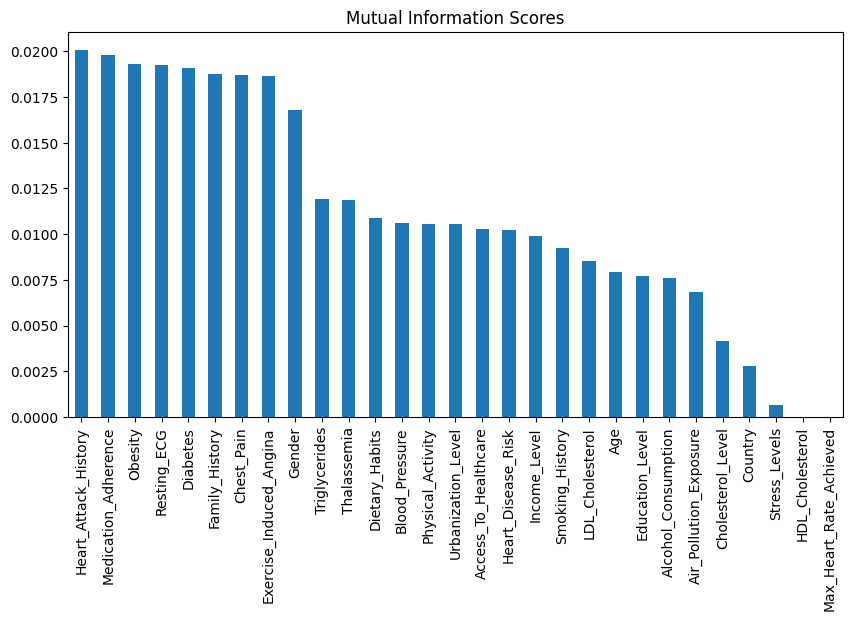

In [124]:
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information
mi_scores = mutual_info_classif(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
mi_series.plot(kind='bar')
plt.title("Mutual Information Scores")
plt.show()


In [274]:
X = df.drop(columns=['Heart_Attack_Outcome'])
y = df['Heart_Attack_Outcome']

# top 5 features
top_features = mi_series.head(8).index
X = X[top_features]

In [275]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [276]:
from sklearn.preprocessing import Normalizer

# Assuming X_train and X_test are your feature matrices
scaler = Normalizer()

# Apply the normalizer to the training and test data
X_train_normalised = scaler.fit_transform(X_train)
X_test_normalised = scaler.transform(X_test)


In [277]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_normalised, y_train)

In [278]:
from imblearn.under_sampling import RandomUnderSampler

# sampling_strategies to try 'majority', 'not minority', 'not majority', 'all'

# Initialize the undersampler
undersampler = RandomUnderSampler(sampling_strategy='all', random_state=42)

# Apply undersampling
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_normalised, y_train)

# knn weights = 'distance' or 'uniform'

# Train the KNN model with the resampled data
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(weights='distance')

In [279]:
# Predict
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

c:\Users\mjcul\Github\DataScience\venv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


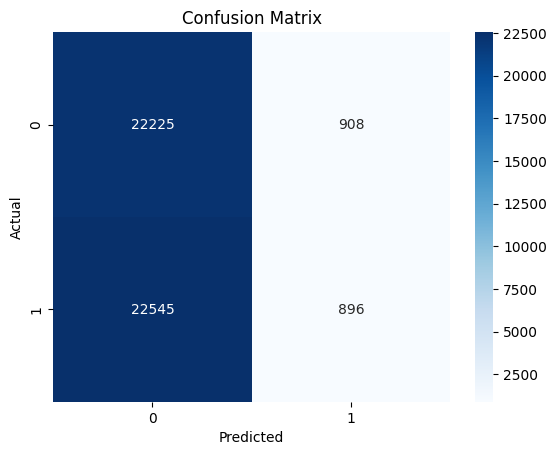

In [280]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [281]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4964357796195302
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.96      0.65     23133
           1       0.50      0.04      0.07     23441

    accuracy                           0.50     46574
   macro avg       0.50      0.50      0.36     46574
weighted avg       0.50      0.50      0.36     46574

